# 6.回归分析

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

## 6.1 一元线性回归

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# filename = "/content/drive/MyDrive/Colab Notebooks/大数据基础/data.xlsx"
filename = 'data.xlsx'
df = pd.read_excel(filename,header=0,sheet_name='因子分析2',index_col='编号')
df.head(5)
# index如果有重复值，需要重新index一下，不然后面可能会出错
df.index = range(df.shape[0])

In [11]:
## 设置显示中文（Colab）
# import matplotlib as mpl
# zhfont = mpl.font_manager.FontProperties(fname='/content/drive/MyDrive/Colab Notebooks/大数据基础/SimHei.ttf')
# plt.rcParams['axes.unicode_minus'] = False
# ## for Seaborn
# sns.set(font=zhfont.get_name())

In [12]:
# 设置显示中文（正常情况下）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.set(font='SimHei')

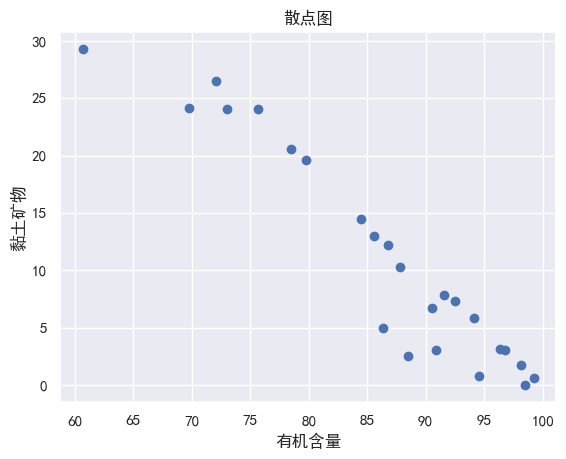

In [13]:
# 取两列
# print(df[['PM2.5','PM10']])
df1 = df[['有机含量','黏土矿物']]
# dataframe中按列提取的结果是series，这里将使用的是series的值
X = df['有机含量'].values  #自变量
Y = df['黏土矿物'].values #因变量
# print(X)

plt.scatter(X,Y,marker='o',c='b')
plt.title('散点图')
plt.xlabel('有机含量')
plt.ylabel('黏土矿物')
plt.show()


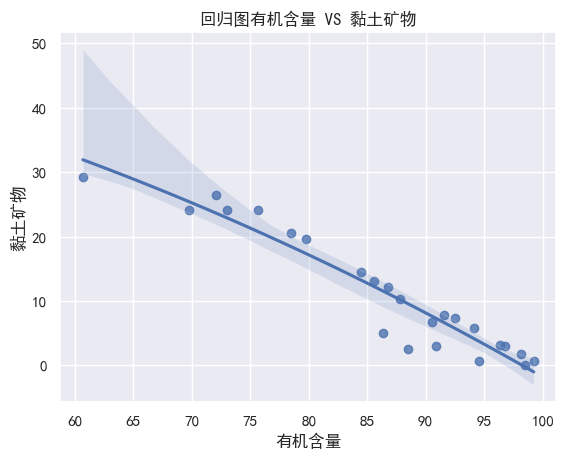

In [14]:

sns.regplot(x='有机含量',y='黏土矿物',data=df1,order=2)
plt.xlabel('有机含量')
plt.ylabel('黏土矿物')
plt.title('回归图有机含量 VS 黏土矿物')
plt.savefig('回归.png')

plt.show()


Text(0.5, 1.0, '回归图有机含量 VS 黏土矿物')

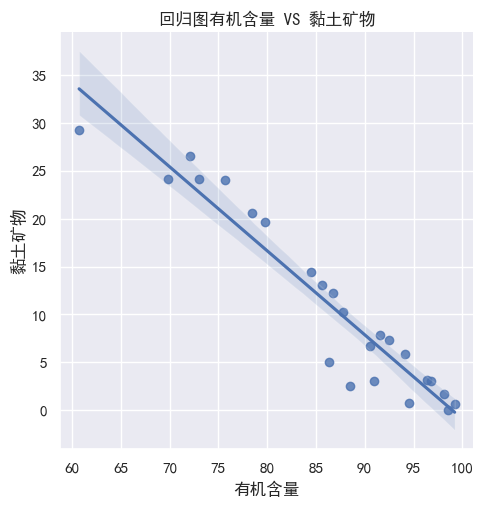

In [15]:
sns.lmplot(x='有机含量',y='黏土矿物',data=df1,order=1)
plt.xlabel('有机含量')
plt.ylabel('黏土矿物')
plt.title('回归图有机含量 VS 黏土矿物')

In [16]:
df.iloc[:,4:6]

,SiO2,Fe2O3
0,46.20,5.26
1,47.52,3.68
2,47.86,7.82
3,45.04,7.44
4,36.22,24.29
5,47.40,3.76
6,86.62,8.87
7,46.94,14.59
8,48.66,8.41
9,35.18,1.58


StopIteration: 

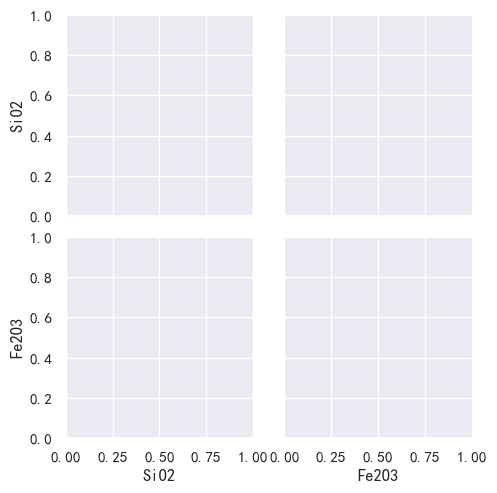

In [17]:

sns.pairplot(df.iloc[:,4:6])

StopIteration: 

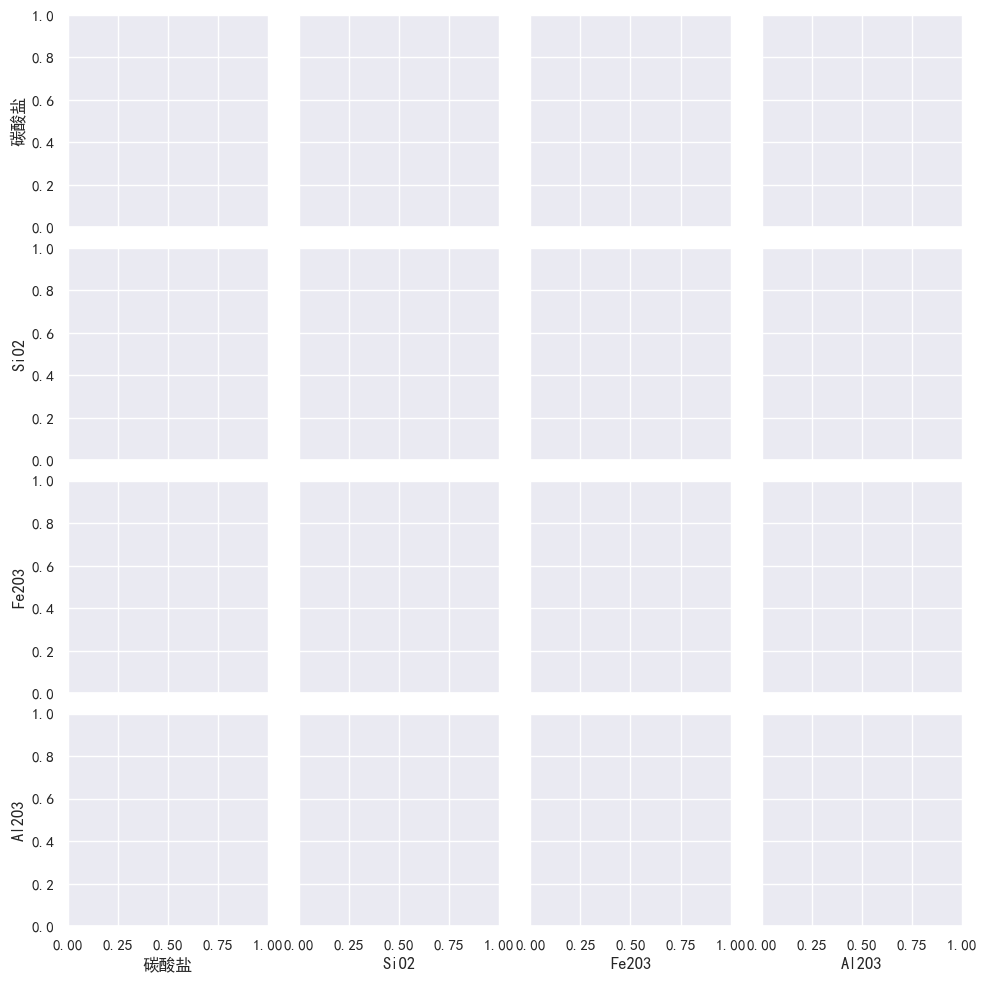

In [18]:
sns.pairplot(df.iloc[:,3:7])
# plt.xlabel(fontproperties=zhfont)

### 6.1.1 使用OLS直接计算

In [22]:
#一元线性回归的参数估计，OLS算法
# 请结合课堂PPT中的OLS计算方法理解下列2行代码
b=np.sum((X-np.mean(X))*(Y-np.mean(Y)))/np.sum((X-np.mean(X))**2)
a=np.mean(Y)-b*np.mean(X)

print('应用普通最小二乘法估计的回归系数：a=%0.4f,b=%0.4f'%(a,b))
print('回归方程：y=%0.4f + %0.4f x'%(a,b))

应用普通最小二乘法估计的回归系数：a=86.8079,b=-0.8772
回归方程：y=86.8079 + -0.8772 x


### 6.1.2 使用sklearn

回归系数: 
 [[-0.88763068]]
截距: 
 [89.16597069]
均方根误差: 11.76
决定系数: 0.88


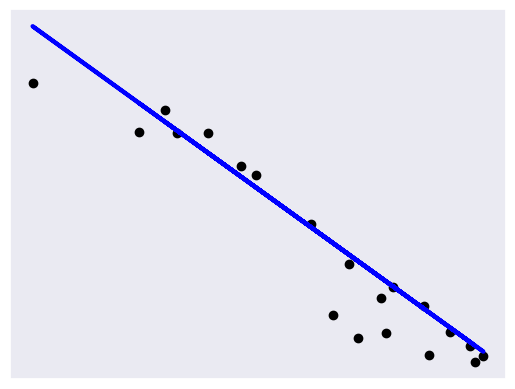

In [23]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# 这里需要二维数组，需要将一维数组转为二维数组
X=X.reshape(X.size,1)
Y=Y.reshape(Y.size,1)
# print(X)
# 把数据分割成训练集和测试集
X_train = X[:-20]
X_test = X[-20:]
Y_train = Y[:-20]
Y_test = Y[-20:]
# 模型搭建
regr = linear_model.LinearRegression()
# 训练模型
regr.fit(X_train,Y_train)
# 用测试集预测
y_pred = regr.predict(X_test)

# 回归系数和截距
print("回归系数: \n", regr.coef_)
print("截距: \n", regr.intercept_)
# 均方根误差
print("均方根误差: %.2f" % mean_squared_error(Y_test, y_pred))
# 决定系数:1为完美预测
print("决定系数: %.2f" % r2_score(Y_test, y_pred))

# 绘图输出
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

['有机含量' '黏土矿物' 'FeS2' '碳酸盐' 'SiO2' 'Fe2O3' 'Al2O3' 'CaO' 'MgO']
(18, 1)
(18, 1)
(6, 1)
(6, 1)
----------------模型---------------------
[84.84795549]
[[-0.85043723]]
-0.8504372348072172
拟合方程为： -0.8504372348072172 * x + 84.84795549266379
---------------评价-------------------------
均方误差: 13.144324676966669
均方根误差: 3.6255102643582005
平均绝对误差(MAE)：2.8218720290677943
R2： 0.7391571953438805
---------------交叉验证-------------------------
均方误差: 9.059586039032666
均方根误差: 3.0099146232132012


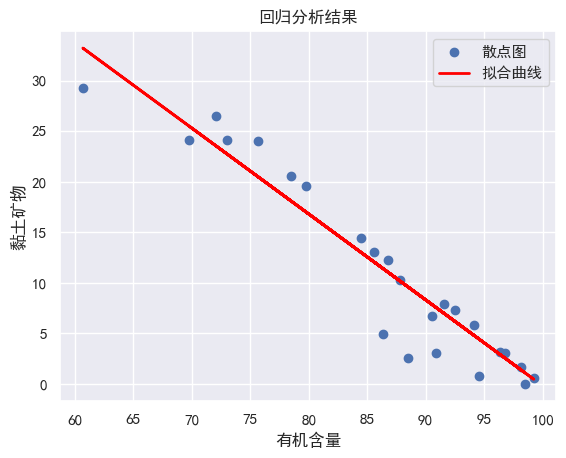

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
# Load the diabetes dataset
# filename = "/content/drive/MyDrive/Colab Notebooks/大数据基础/data.xlsx"
filename = 'data.xlsx'
df = pd.read_excel(filename,header=0,sheet_name='因子分析2',index_col='编号')
# print(df)
fields = df.columns.values
print(fields)
df_list = df.values
X = df[['有机含量']]
y = df[['黏土矿物']]


# 我们把X和y的样本组合划分成两部分，一部分是训练集，一部分是测试集，代码如下：
# from sklearn.cross_validation import train_test_split  出错

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# 查看下训练集和测试集的维度：
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print (y_test.shape)

# 运行scikit-learn的线性模型
print("----------------模型---------------------")

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.intercept_)
print(linreg.coef_)
print(linreg.coef_[0,0])
print("拟合方程为：", str(linreg.coef_[0,0]) + ' * x + ' + str(linreg.intercept_[0]))
# 模型评价
#模型拟合测试集
print("---------------评价-------------------------")
y_pred = linreg.predict(X_test)

# 用scikit-learn计算MSE
print("均方误差:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("均方根误差:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"平均绝对误差(MAE)：{metrics.mean_absolute_error(y_test, y_pred)}")
print('R2：',metrics.r2_score(y_test, y_pred))
# 交叉验证
print("---------------交叉验证-------------------------")

predicted = cross_val_predict(linreg, X, y, cv=10)
# 用scikit-learn计算MSE
print("均方误差:",metrics.mean_squared_error(y, predicted))
# 用scikit-learn计算RMSE
print("均方根误差:",np.sqrt(metrics.mean_squared_error(y, predicted)))
# 画图观察结果
# fig, ax = plt.subplots()
# # fig.figure(num='回归曲线')
# # ax.scatter(y, predicted)
# ax.scatter(X, y)
# # ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.plot(X, linreg.coef_[0,0]*X+linreg.intercept_[0],color='red', linewidth=2.0)
# ax.set_xlabel('透明度')
# ax.set_ylabel('遥感透明度')
# plt.savefig('plot.png')
# plt.show()

plt.figure(num="回归分析结果")
plt.scatter(X,y,label='散点图')
plt.plot(X, linreg.coef_[0,0]*X+linreg.intercept_[0],color='red', linewidth=2.0,label='拟合曲线')
plt.title('回归分析结果')
plt.xlabel('有机含量')  # 设置x轴的名称
plt.ylabel('黏土矿物')   # 设置y轴额名称
# plt.text(17.5,33,'拟合方程是：')
# plt.text(18,32,str(linreg.coef_[0,0]) + ' * x + ' + str(linreg.intercept_[0]))
# plt.text(18,31,'R2：' + str(metrics.r2_score(y_test, y_pred)))
# plt.text(18,30,'均方误差：'+ str(metrics.mean_squared_error(y, predicted)))
# plt.text(18,29,'均方根误差：'+ str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
# plt.text(18,28,'平均绝对误差：'+ str(metrics.mean_absolute_error(y_test, y_pred)))

plt.legend()
plt.savefig('result.png')
plt.show()

### 6.1.3 使用stasmodels进行一元线性回归

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
weight_model=sm.add_constant(X)
###使用Statsmodels的OLS函数进行线性回归。
result=sm.OLS(Y,weight_model).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     223.6
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           5.23e-13
Time:                        14:35:06   Log-Likelihood:                -58.512
No. Observations:                  24   AIC:                             121.0
Df Residuals:                      22   BIC:                             123.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.8079      5.099     17.026      0.000      76.234      97.382
有机含量          -0.8772      0.059    -14.953      0.000      -0.999      -0.756
==============================================================================
Omnibus:                        5.944   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                4.701
Skew:                          -1.083   Prob(JB):                       0.0953
Kurtosis:                       3.103   Cond. No.                         750.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

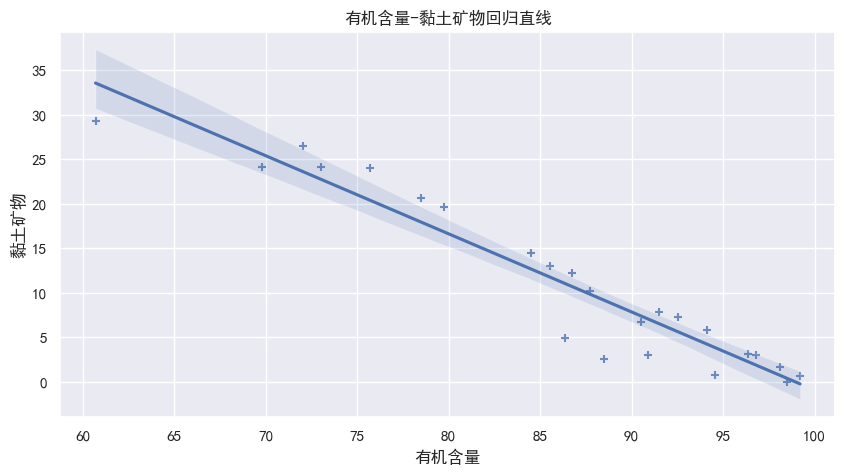

截距：
 86.80788404433862
系数：
 -0.8771732990970467


In [27]:
plt.figure(figsize=(10,5))
sns.regplot(x=X,y=Y,marker='+')
plt.xlabel('有机含量')
plt.ylabel('黏土矿物')
plt.title('有机含量-黏土矿物回归直线')
plt.show()
print('截距：\n',result.params[0])
print('系数：\n',result.params[1])

### 显著性检验

In [28]:
'''
常量和回归系数的的标准误计算过程：上图中的sd(beta0),sd(beta1)计算公式。

'''
####残差，从回归结果对象中获取
res=result.resid 
###残差方差与标准差,注意方差的计算方式
res_var=np.sum((res-np.mean(res))**2)/(len(res)-2)
res_std=res_var**0.5 
### 求自变量weight的校正平方和
sxx=np.sum((X-np.mean(X))**2)
###截距项beta0的标准误
stderr0=res_std*np.sqrt(1/len(X)+np.mean(X)**2/sxx)
print('常数项（截距项）beta0的标准误（std err）：%0.3f'%stderr0)
### 回归系数beta1的标准误
stderr1=res_std/np.sqrt(sxx)
print('\n回归系数beta1的标准误（std err）：%0.3f'%stderr1)

常数项（截距项）beta0的标准误（std err）：5.099

回归系数beta1的标准误（std err）：0.059


d:\big_data_test\envi\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [29]:
'''
回归参数检验：回归常量beta0和回归系数beta1的t值以及t检验
'''
###回归参数beta0,beta1的标准误
t0=a/stderr0
t1=b/stderr1
print('回归参数beta0、beta1的t值分别为：%0.3f,%0.3f'%(t0,t1))
'''
t检验的拒绝域|T|>t'(n-2),分解为P(T<-t')+P(T>t')，即双侧检验的两个概率之和
'''
n=len(X)
##分别计算beta0和beta1的t检验p值
p0=2*st.t.sf(t0,n-2)
p1=2*st.t.sf(t1,n-2)
print('\n回归参数beta0、beta1的t检验P值分别为：{},{}'.format(p0,p1))

回归参数beta0、beta1的t值分别为：17.026,-14.953


NameError: name 'st' is not defined

In [30]:
'''
F检验。
'''
###F值只计算回归系数，无回归常数beta0
F1=beta1**2*sxx/res_var
print('回归系数的F值为：%0.2f'%F1)

###F检验的P值计算，使用生存函数sf计算
p_F1=st.f.sf(F1,1,n-2)
print('\n回归系数的F检验P值为：%0.8f'%p_F1)

NameError: name 'beta1' is not defined

In [31]:
'''
R方以及调整后R方
'''
###残差平方和，总平方和与回归平方和
sse=np.sum(res**2) #残差平方和
#总平方和：sum(y-mean(y)^2)，即因变量减去其均值之后平方和
sst=np.sum((bp-np.mean(bp))**2) 
#回归平方和：sum((y_hat-mean(y))^2)，即因变量回归值减去因变量的平均值的平方和
y_hat=result.predict()#调用predict函数获得y_hat
ssr=np.sum((y_hat-np.mean(bp))**2)
###两种方法计算R方
R2=1-sse/sst #或者
R2=ssr/sst #结果一致，精度稍微有差别
###调整后R方,sse/(n-2)=残差平方和/残差自由度,sst/(n-1)=总平方和/模型自由度
adjR2=1- (sse/(n-2))/(sst/(n-1))
print('R方和调整后R方的值分别为：%0.3f, %0.3f'%(R2,adjR2))

NameError: name 'bp' is not defined

## 6.2 多元线性回归

In [32]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy

fields = df.columns.values
print(fields)
df_list = df.values
data =np.matrix(df_list)
# print(data)
x1 = np.array(df['SiO2'])
x2 = np.array(df['CaO'])
x3 = np.array(df['MgO'])
eps = np.random.normal(0,0.05,len(x1))
X = np.c_[x1,x2,x3]
# print(X)
beta = [0.1,0.2,0.7]
y = np.dot(X,beta) + eps
X_model = sm.add_constant(X)
model = sm.OLS(y,X_model)
results = model.fit()
results.summary()

['有机含量' '黏土矿物' 'FeS2' '碳酸盐' 'SiO2' 'Fe2O3' 'Al2O3' 'CaO' 'MgO']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     8388.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           3.69e-31
Time:                        14:35:16   Log-Likelihood:                 47.841
No. Observations:                  24   AIC:                            -87.68
Df Residuals:                      20   BIC:                            -82.97
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.039      0.154      0.879      -0.076       0.088
x1             0.1001      0.001    143.930      0.000       0.099       0.102
x2             0.1997      0.005     42.283      0.000       0.190       0.210
x3             0.7044      0.008     89.307      0.000       0.688       0.721
==============================================================================
Omnibus:                        2.048   Durbin-Watson:                   2.552
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.089
Skew:                           0.026   Prob(JB):                        0.580
Kurtosis:                       1.958   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
df_1 = pd.read_excel(filename,header=0,sheet_name='Sheet2',index_col='编号')
df_1

,类别,SiO2,CaO,MgO,Al2O3,K2O,Na2O,Cu,Mo,Ag
编号,,,,,,,,,,
0,1,73.74,0.33,0.82,10.75,5.20,0.58,0.11,0.077,1.40
1,1,72.73,0.58,1.14,11.97,5.48,0.89,0.21,0.070,1.53
2,1,72.44,1.62,1.45,10.88,4.80,0.14,0.05,0.227,0.20
3,1,71.28,1.37,1.05,11.50,4.83,0.36,0.17,0.222,2.70
4,1,77.42,0.52,0.54,8.63,4.36,0.40,0.08,0.043,1.80
5,1,80.42,0.22,0.71,7.86,4.13,0.22,0.18,0.045,2.07
6,1,82.79,0.20,0.31,6.63,3.40,0.16,0.10,0.041,2.90
7,1,76.23,0.52,0.56,9.72,5.38,0.36,0.13,0.062,2.65
8,1,77.42,1.43,0.70,8.22,4.50,0.08,0.11,0.073,4.30


In [34]:
fields = df.columns.values
print(fields)

['有机含量' '黏土矿物' 'FeS2' '碳酸盐' 'SiO2' 'Fe2O3' 'Al2O3' 'CaO' 'MgO']


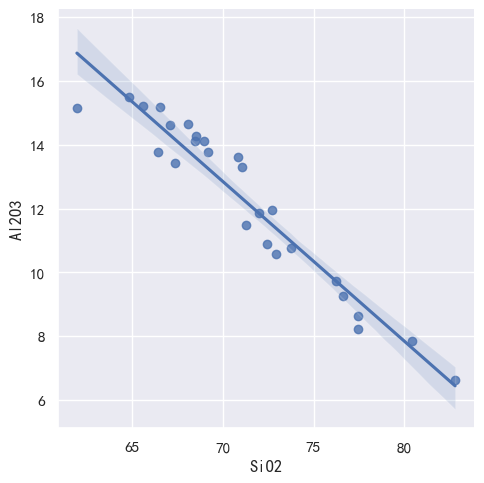

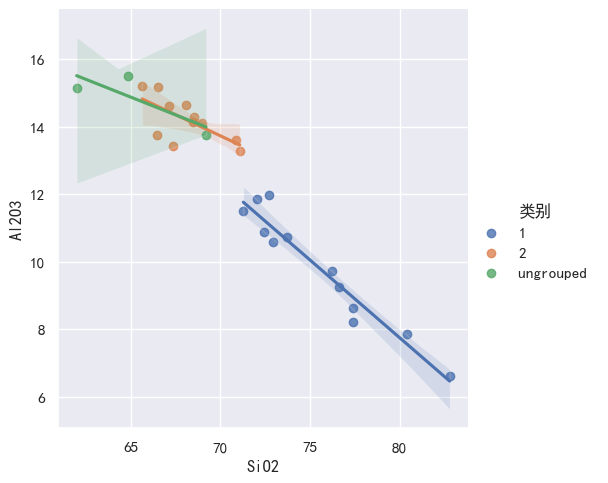

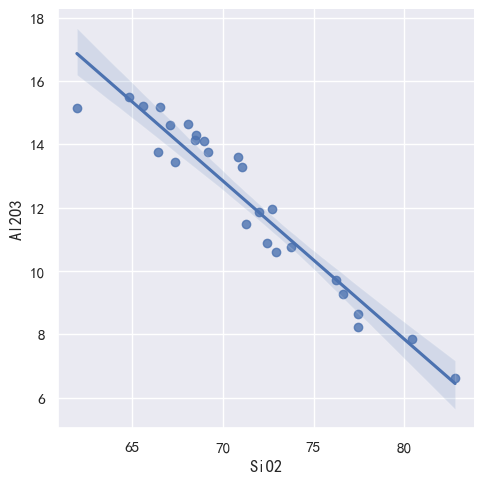

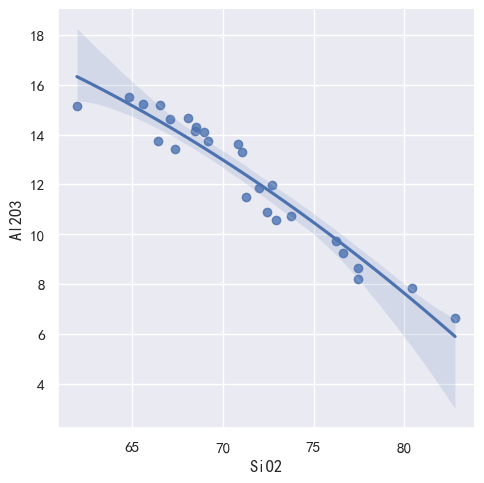

In [35]:
sns.lmplot(x='SiO2',y='Al2O3',data=df_1)
sns.lmplot(x='SiO2',y='Al2O3',data=df_1,hue='类别')
sns.lmplot(x='SiO2',y='Al2O3',data=df_1,ci=95)
sns.lmplot(x='SiO2',y='Al2O3',data=df_1,order=2)  #一元线性回归